# Dream Housing Finance company

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Population_Data.csv")
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [3]:
data.shape

(38, 9)

# K-means clustering

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [5]:
data.describe(include = 'all')

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
count,38,38.000000,38,38,38,38,38,38,38
unique,38,NaN,38,38,38,38,38,37,38
top,Region 31,NaN,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718",181,"35,27,378"
freq,1,NaN,1,1,1,1,1,2,1
mean,NaN,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,11.113055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,10.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,28.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Region                0
Office Location Id    0
Indians               0
Foreigners            0
Indian_Male           0
Indian_Female         0
Foreigners_Male       0
Foreigners_Female     0
Total Population      0
dtype: int64

__The numerical  features here are being recognized as object datatype because they have been separated by comma.__
__therefore we must convert these features into numerical datatype.__

In [7]:
numerical=["Indians","Foreigners","Indian_Male","Indian_Female","Foreigners_Male","Foreigners_Female","Total Population"]
def cleaner(z):
    return z.replace(",","")

In [8]:
for i in data[numerical]:
    data[i]= data[i].apply(cleaner)

In [9]:
#converting the object datatype into numeric datatype
data[numerical] = data[numerical].apply(pd.to_numeric)

# Now we will perform the feature scaling but before that we need to check the integrity of the data

- __It can be done by : checking if the sum of the foreign and Indian is equal to the sum of total population.__

- __Whether the sum of the males and females is equal to the total population.__

In [10]:
data[["Indians","Foreigners"]].sum().sum() - data["Total Population"].sum()

0

In [11]:
a = data["Indians"] + data["Foreigners"]
b = a - data["Total Population"]
b.sum()

0

# Data in terms of foreign and Indian population is integrated as we found above.

# Now we'll check it for the gender

In [12]:
Male = data["Indian_Female"] + data["Indian_Male"]
Female = data["Foreigners_Female"] + data["Foreigners_Male"]
population = Male+ Female



In [13]:
(population- data["Total Population"]).sum()

-112859

# The above result indicates that there are customers who have not revealed their gender identity. 

# So here we can introduce another category in gender column named as "other".

In [14]:
data["Other"] = data["Total Population"] - population
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [15]:
# Trying to find the unique values in Region and office id to see if there is any link present

data["Region"].nunique(), data["Office Location Id"].nunique()

(38, 38)

In [16]:
#From the above result we can conclude that the these are unique dor each row so we can remove them

data1 = data.drop(columns= ["Region", "Office Location Id"])
data1.head()



,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Other
0,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,194379,650744,161803,32576,631660,10652,845123,8432
3,107360,470708,85343,22017,450267,6389,578068,14052
4,55351,329980,31796,23555,325105,3684,385331,1191


# Now we are vready to  normalize the data.


In [17]:
from sklearn.preprocessing import Normalizer
normal = Normalizer()
columns = data1.columns
data1 = normal.fit_transform(data1)
data1 = pd.DataFrame(data1, columns= columns)

data1.head()


,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Other
0,0.119402,0.535009,0.081713,0.037689,0.512735,0.013453,0.654412,0.008821
1,0.114292,0.536533,0.076262,0.038030,0.517744,0.009885,0.650824,0.008904
2,0.153579,0.514152,0.127840,0.025738,0.499074,0.008416,0.667731,0.006662
3,0.121717,0.533656,0.096756,0.024961,0.510481,0.007243,0.655373,0.015931
4,0.091280,0.544174,0.052435,0.038845,0.536135,0.006075,0.635454,0.001964


In [18]:
# Implimentation of Clustering (K-means clustering)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2)
kmeans.fit(data1)
pred = kmeans.predict(data1)
pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [19]:
kmeans.inertia_

0.019443080131807174

In [20]:
kmeans.score(data1)

-0.019443080131807174

In [21]:
sse = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster)
    kmeans.fit(data1)
    sse.append(kmeans.inertia_)

In [22]:
frame = pd.DataFrame({'cluster': range(1,10),'sse': sse})
frame

,cluster,sse
0,1,0.051713
1,2,0.019443
2,3,0.012372
3,4,0.008462
4,5,0.006559
5,6,0.005214
6,7,0.004378
7,8,0.003512
8,9,0.002879


# Visualization of the results

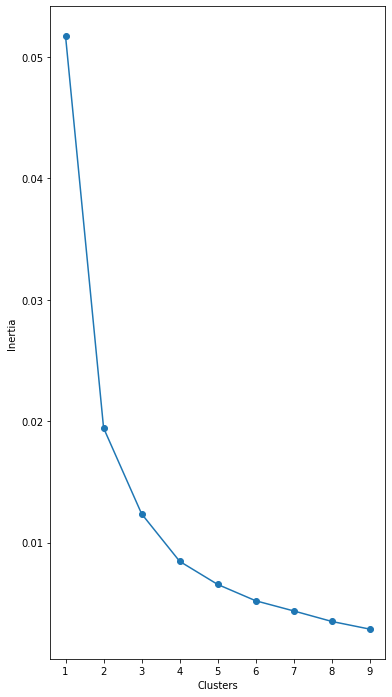

In [23]:
#performing the elbow method to get the ideal number of clusters

plt.figure(figsize=(6,12))
plt.plot(frame["cluster"], frame["sse"], marker = 'o')
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

In [24]:
# Ideal number of clusters be 3

kmeans = KMeans(n_clusters= 3)
kmeans.fit(data1)
pred = kmeans.predict(data1)
data1["cluster"] = pred
data1

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Other,cluster
0,0.119402,0.535009,0.081713,0.037689,0.512735,0.013453,0.654412,0.008821,2
1,0.114292,0.536533,0.076262,0.038030,0.517744,0.009885,0.650824,0.008904,2
2,0.153579,0.514152,0.127840,0.025738,0.499074,0.008416,0.667731,0.006662,0
3,0.121717,0.533656,0.096756,0.024961,0.510481,0.007243,0.655373,0.015931,0
4,0.091280,0.544174,0.052435,0.038845,0.536135,0.006075,0.635454,0.001964,1
5,0.141977,0.522276,0.124607,0.017369,0.499640,0.003761,0.664253,0.018876,0
6,0.091344,0.545689,0.074399,0.016945,0.531166,0.008771,0.637032,0.005751,2
7,0.100927,0.540515,0.068853,0.032074,0.529464,0.010263,0.641443,0.000788,2
8,0.090099,0.546061,0.067732,0.022367,0.532741,0.008786,0.636161,0.004535,2
9,0.102189,0.540577,0.068222,0.033967,0.527483,0.011769,0.642766,0.001325,2


In [25]:
def seg(str_x, str_y, clusters):
  x = []
  y = []

  for i in range(clusters):
    x.append(data1[str_x][data1['cluster']==i])
    y.append(data1[str_y][data1['cluster']==i])
  
  return x,y

def plot_clusters(str_x, str_y, clusters):
  plt.figure(figsize = (5,5), dpi = 120)
  
  x,y = seg(str_x, str_y, clusters)

  for i in range(clusters):
    plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
  plt.xlabel(str_x)
  plt.ylabel(str_y)
  plt.title(str(str_x+" Vs "+str_y))
  plt.legend()
  return ''

C:\Users\Bakul anmol\AppData\Local\Temp\ipykernel_19804\2588016847.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (5,5), dpi = 120)


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

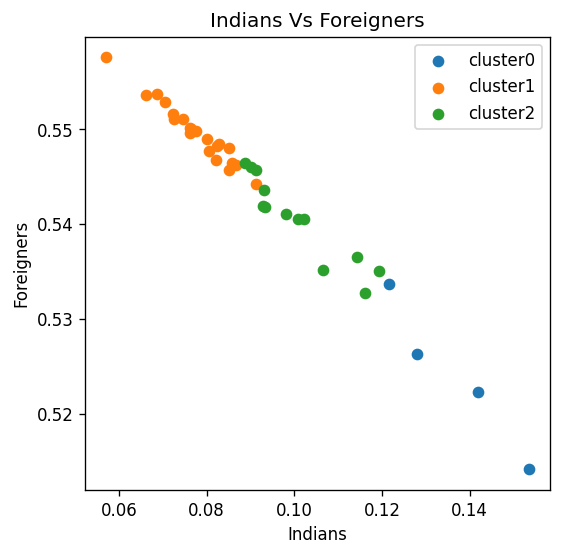

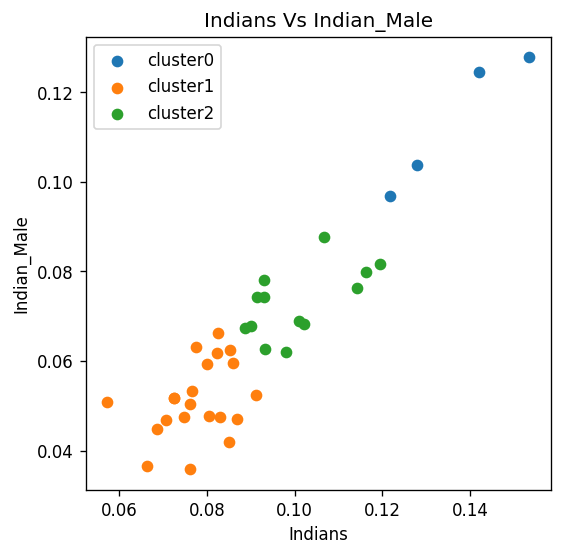

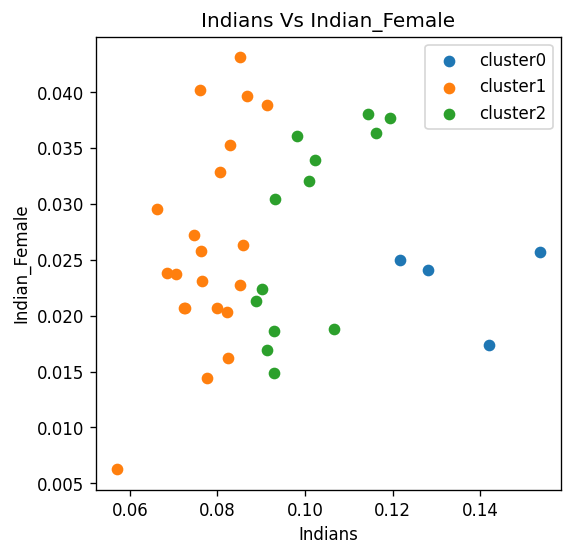

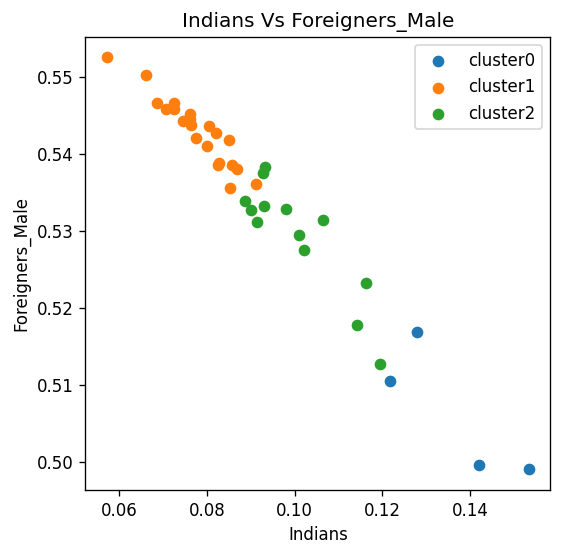

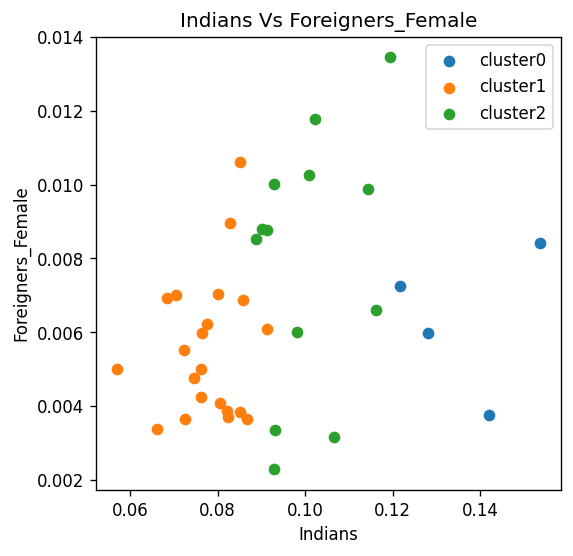

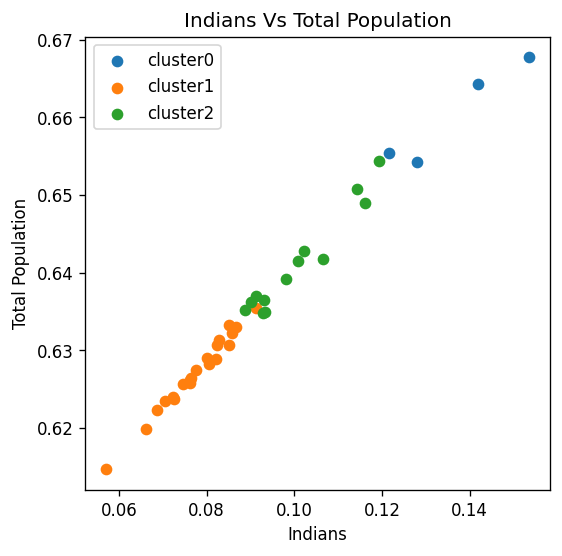

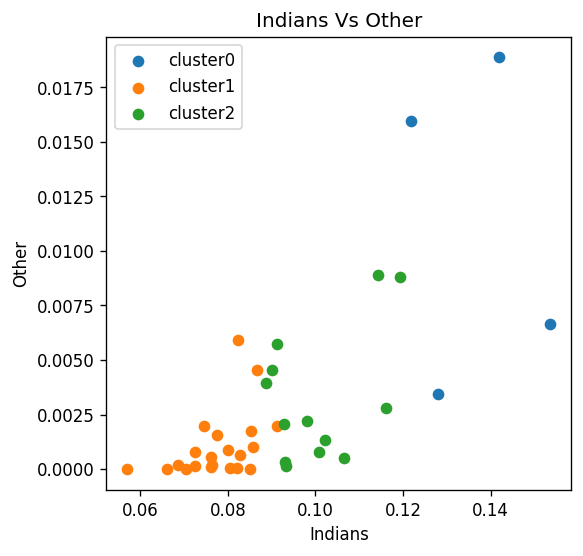

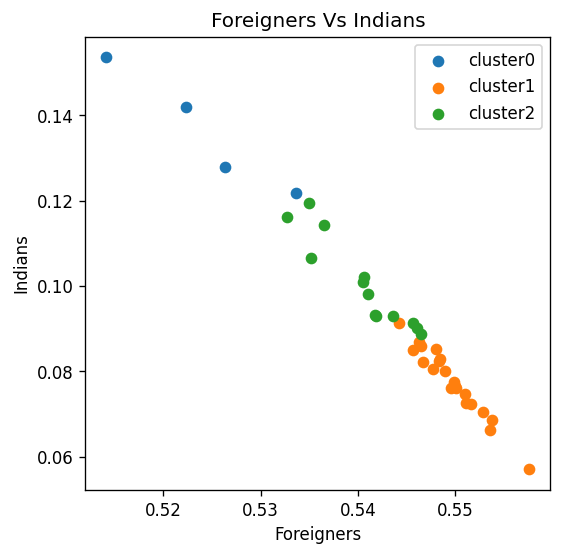

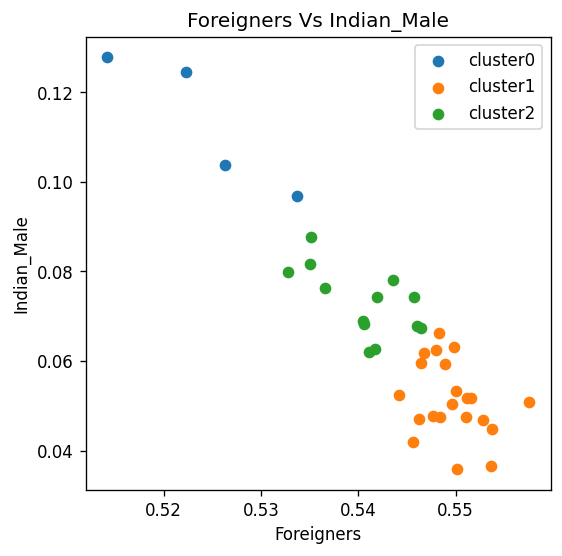

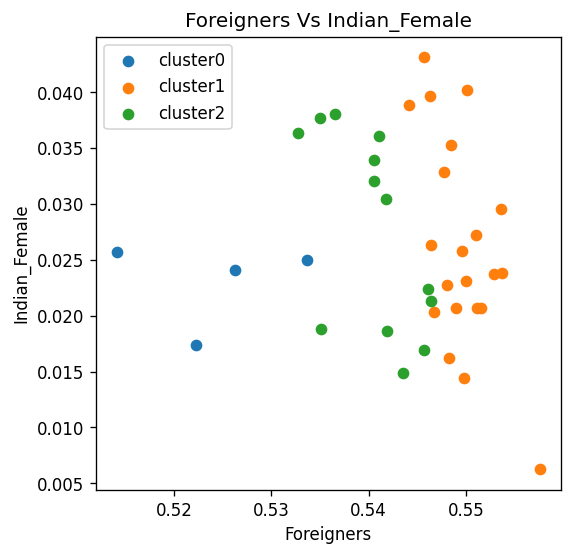

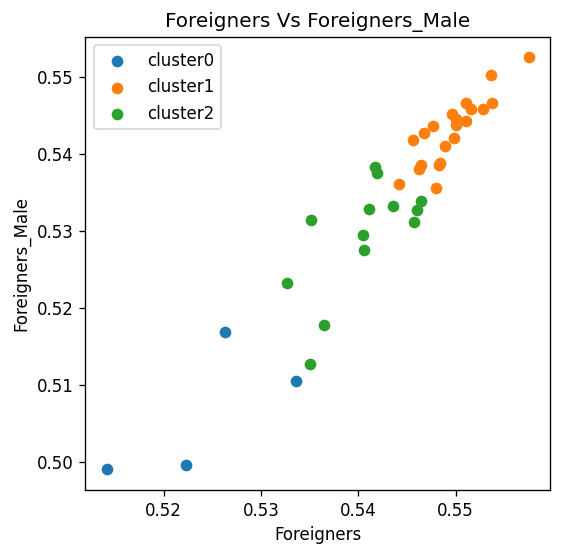

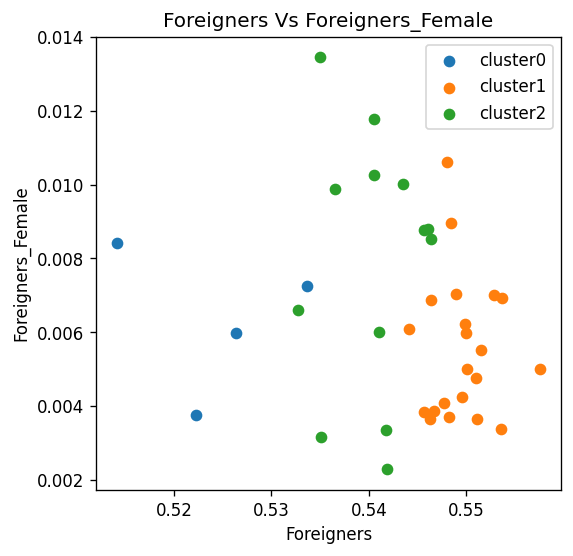

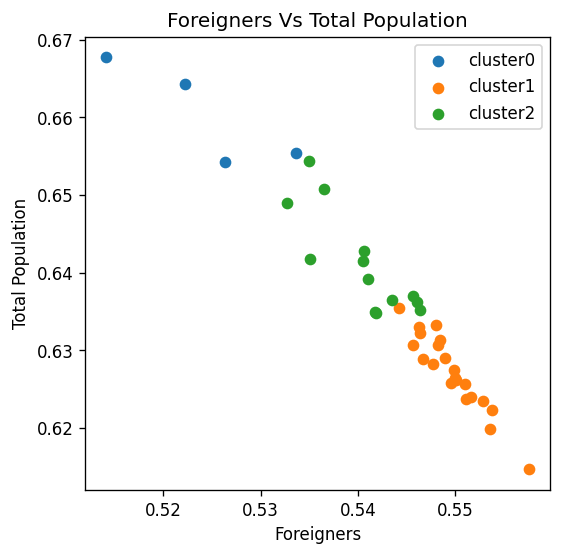

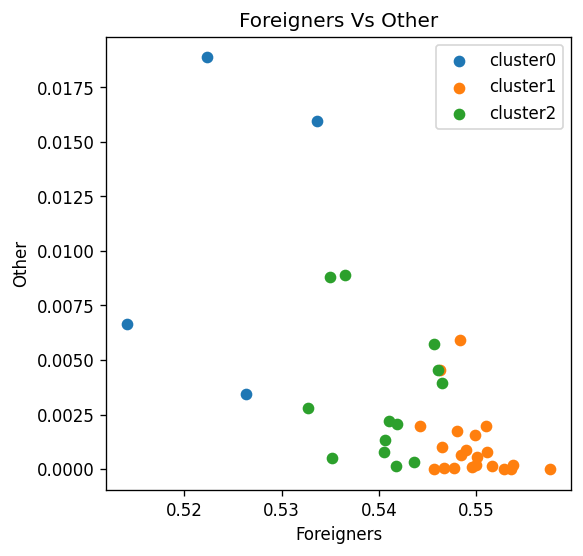

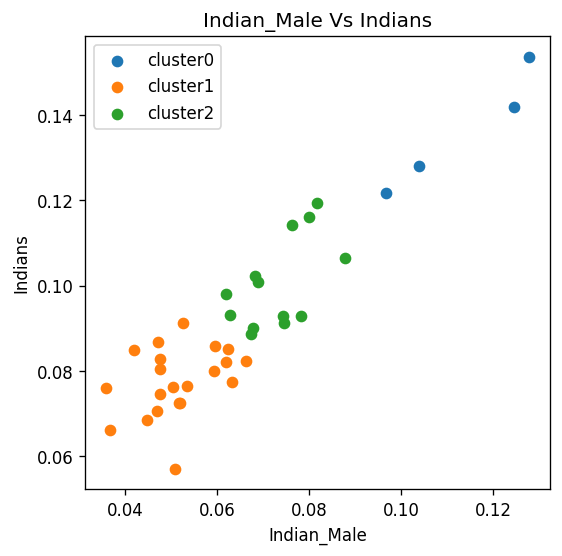

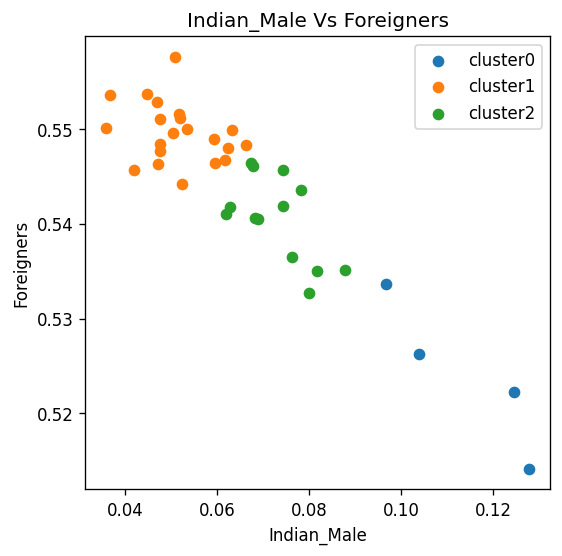

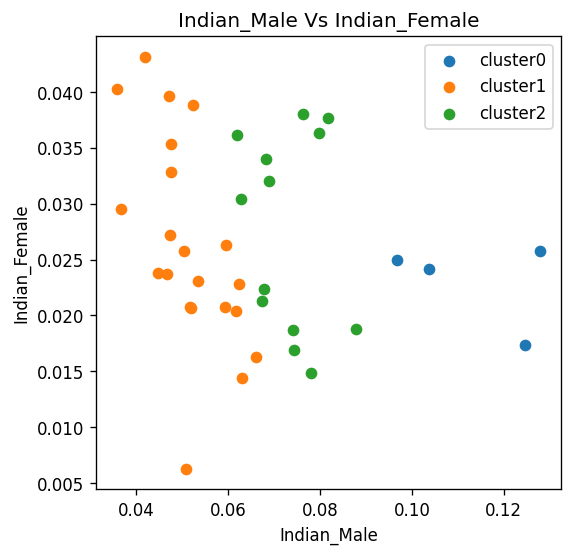

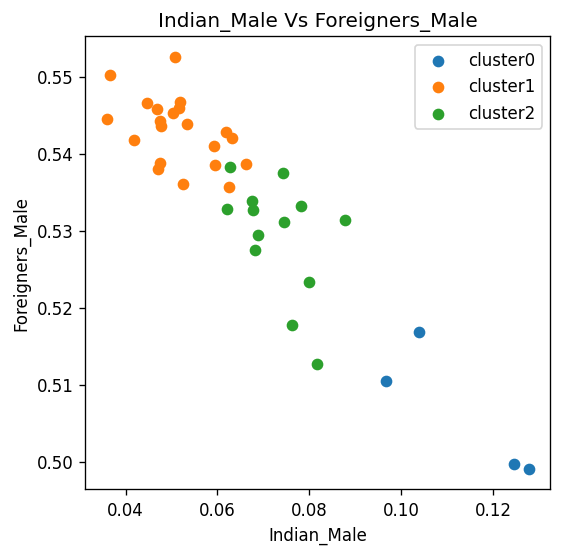

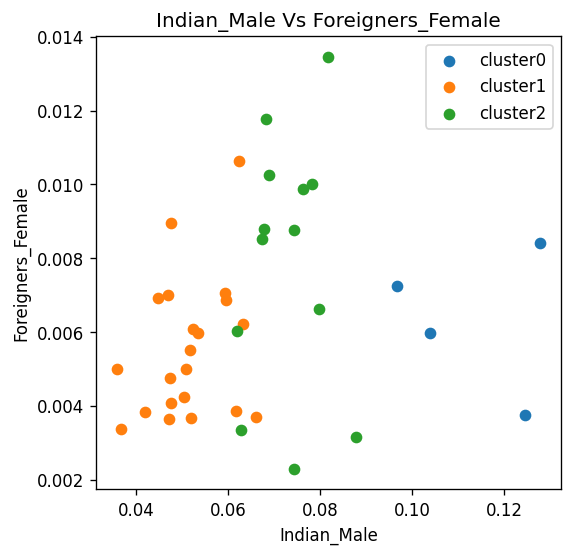

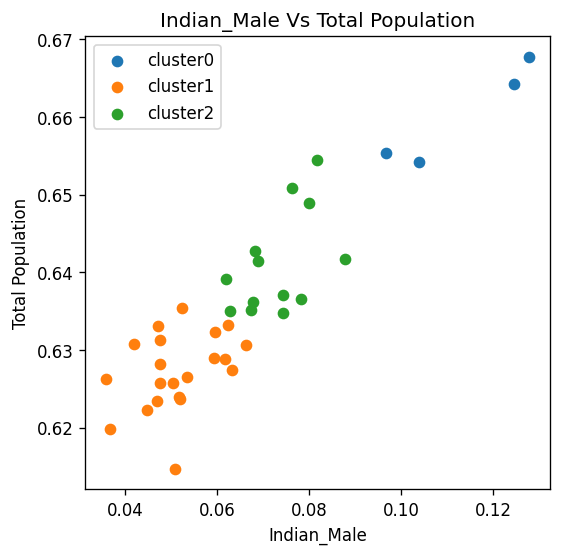

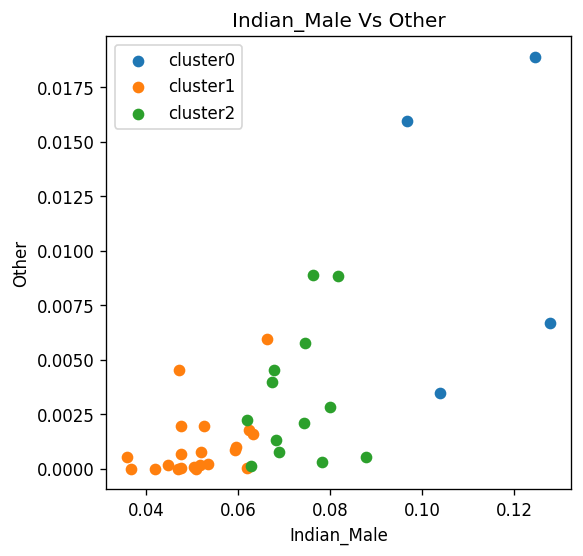

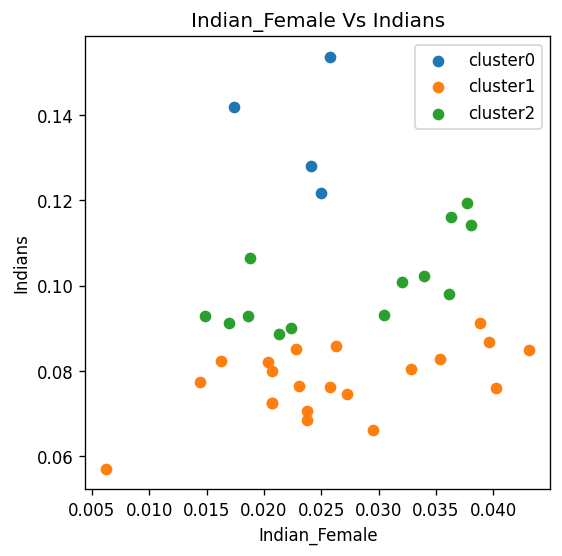

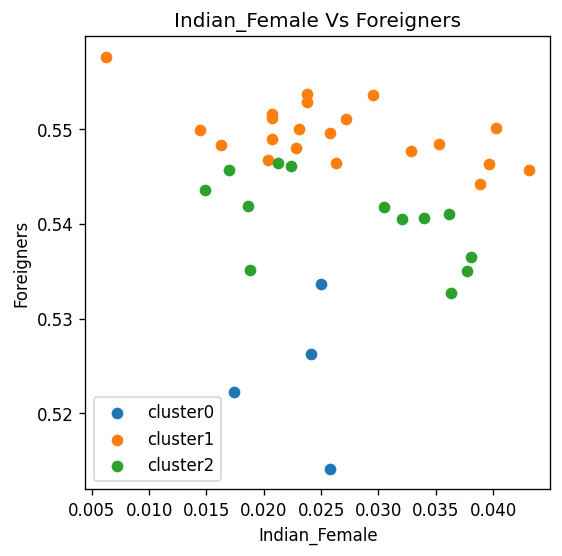

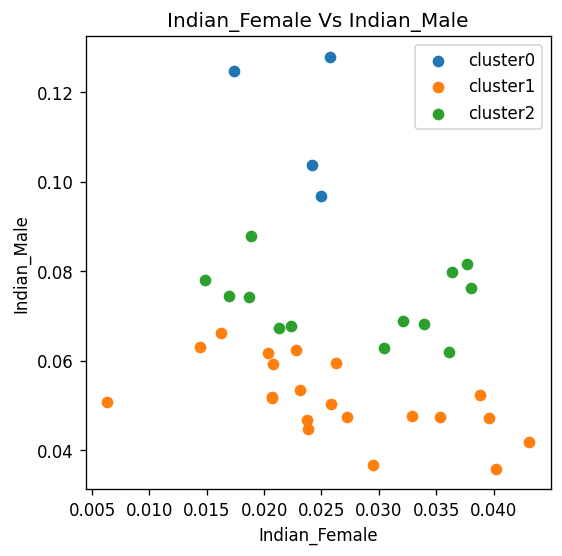

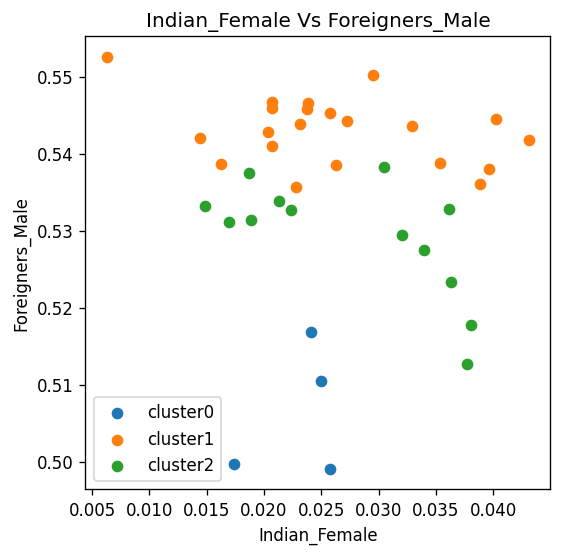

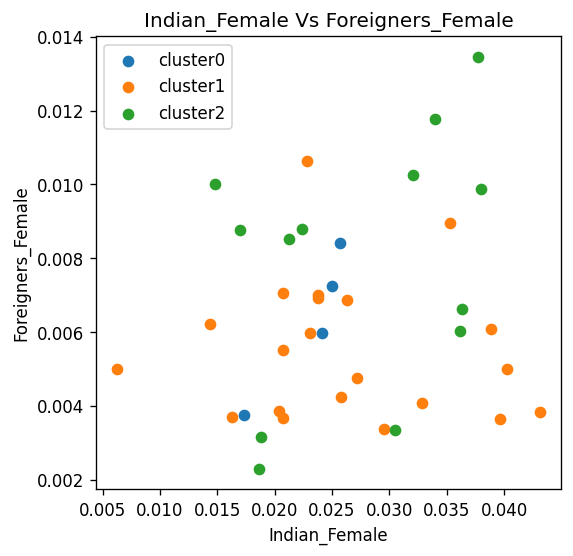

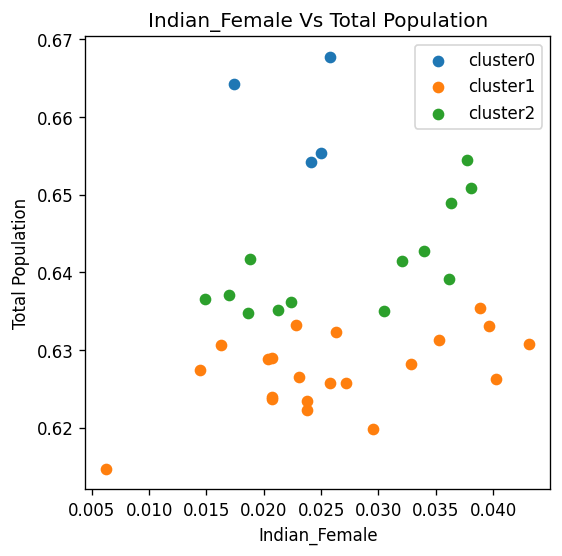

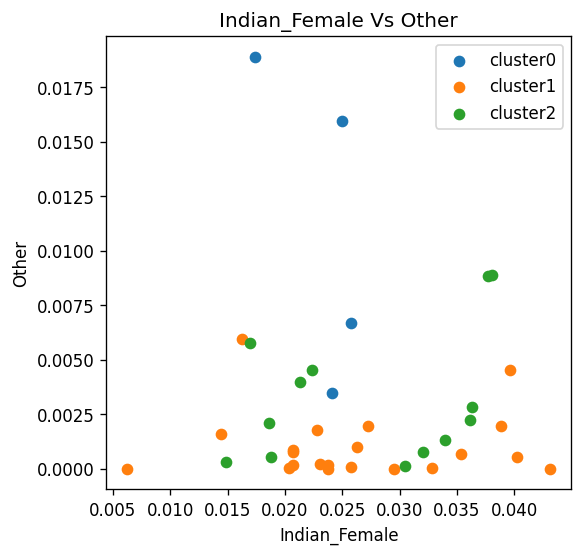

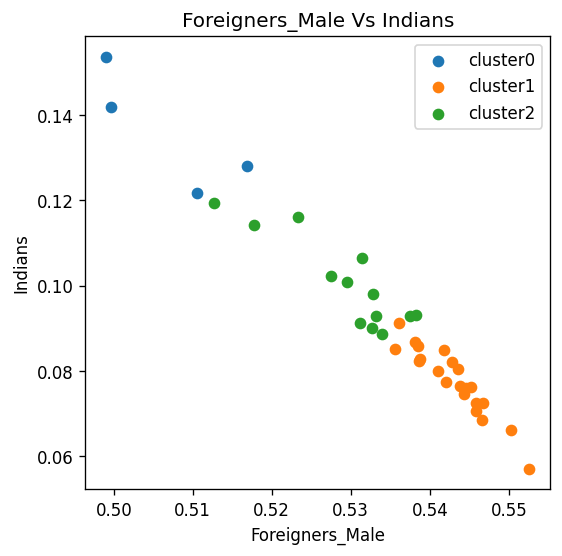

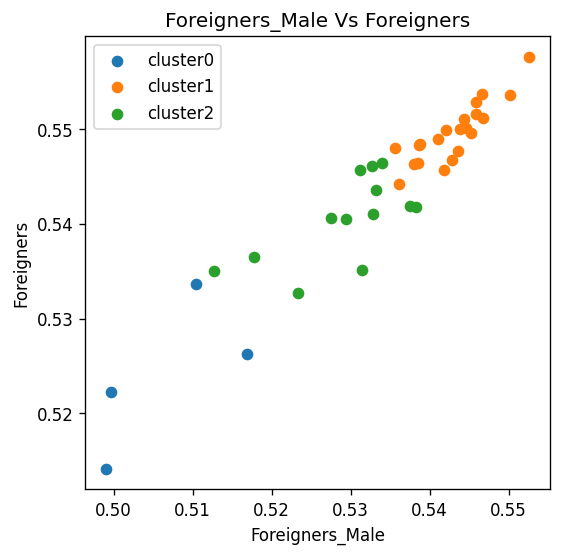

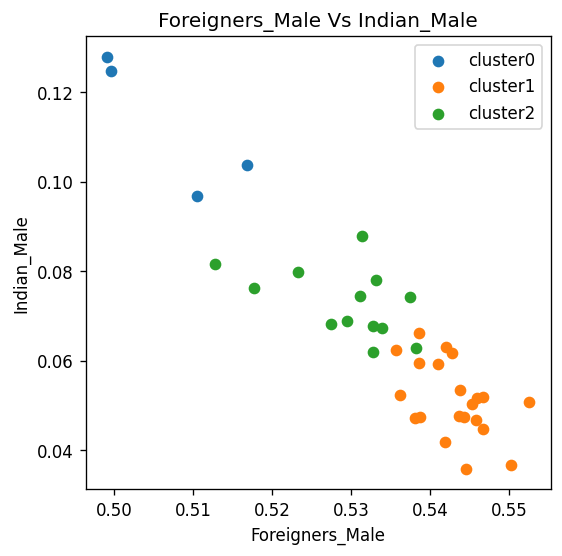

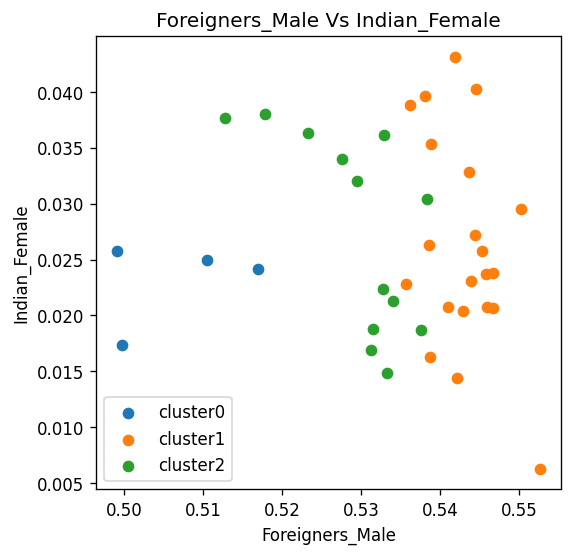

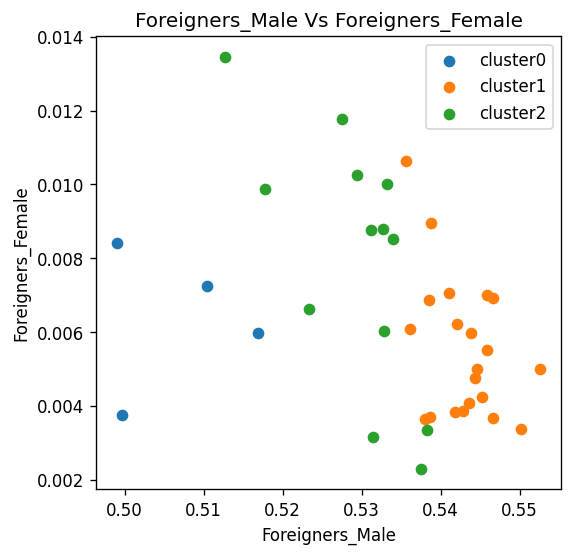

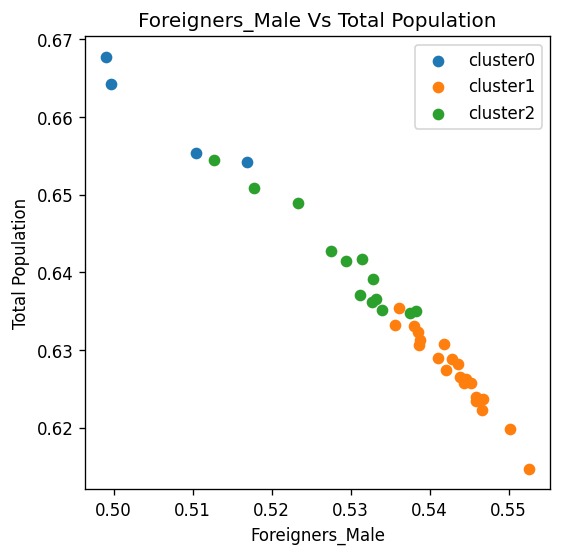

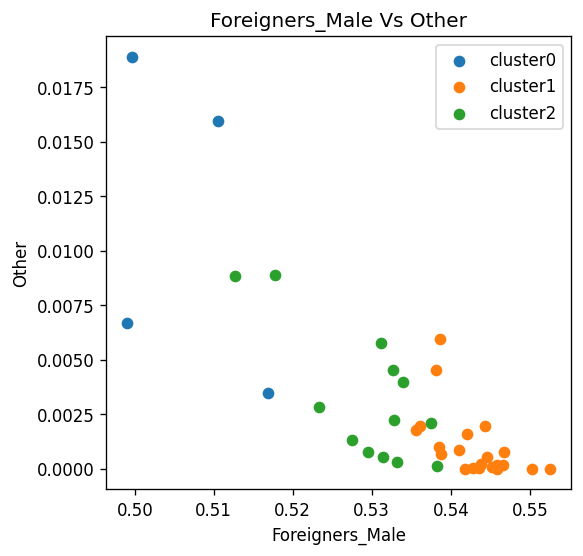

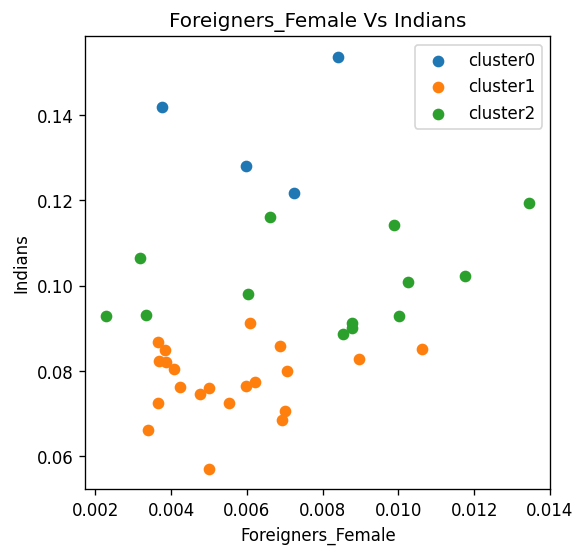

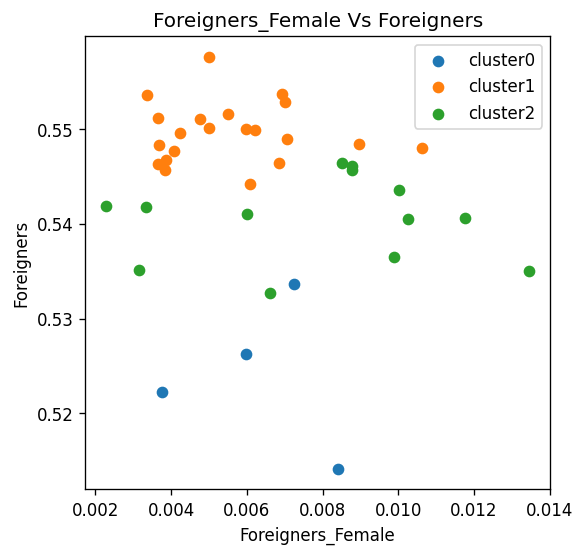

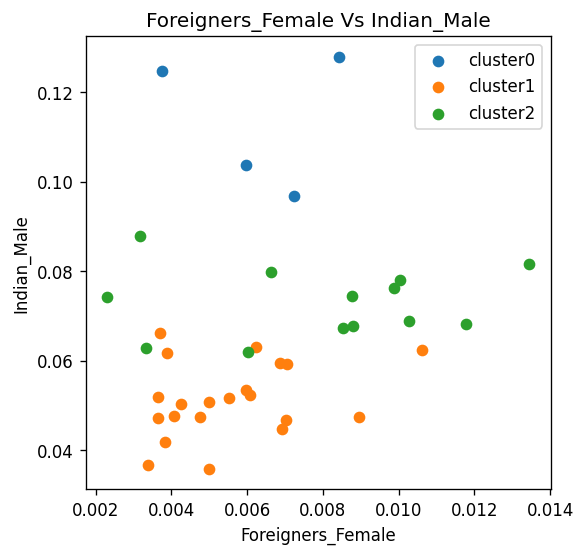

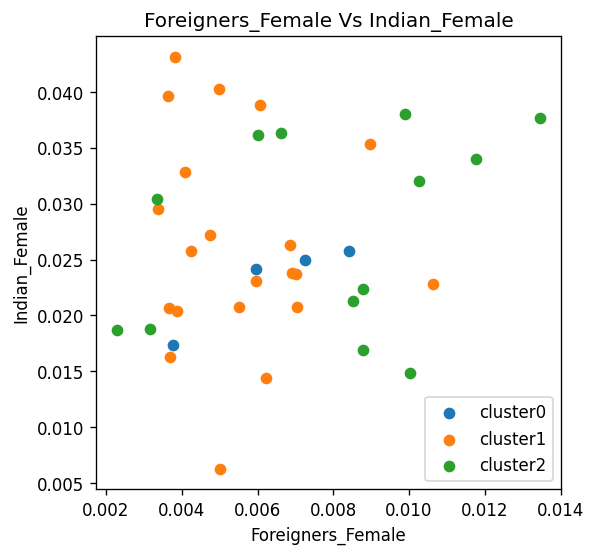

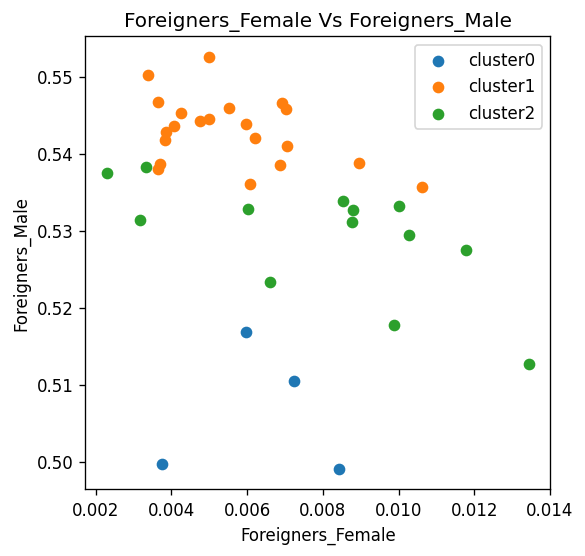

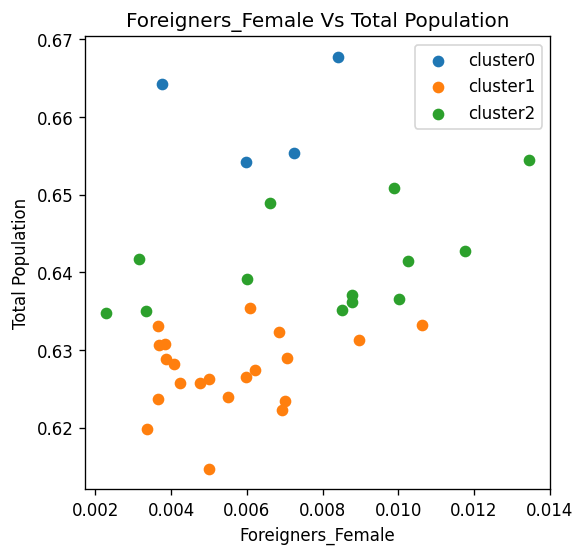

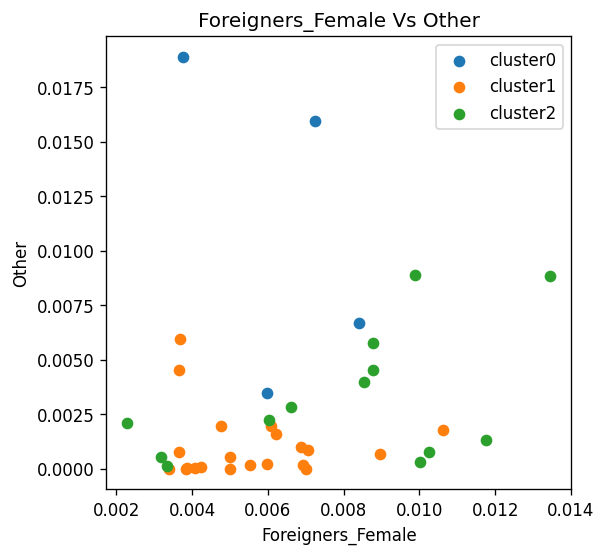

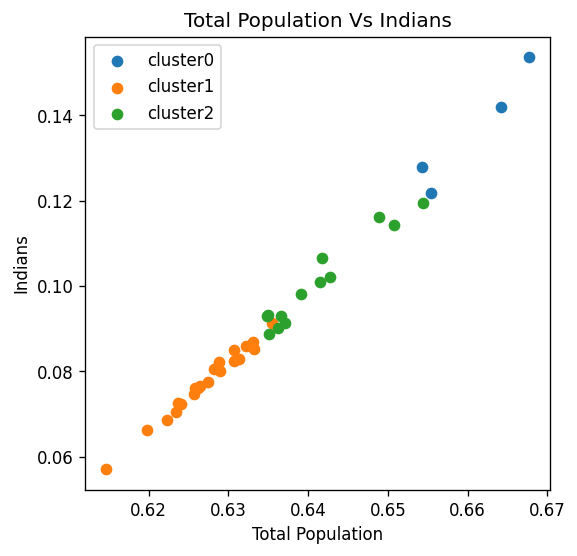

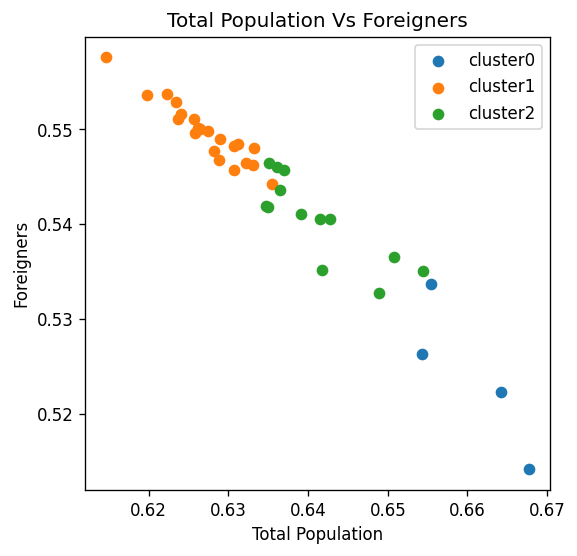

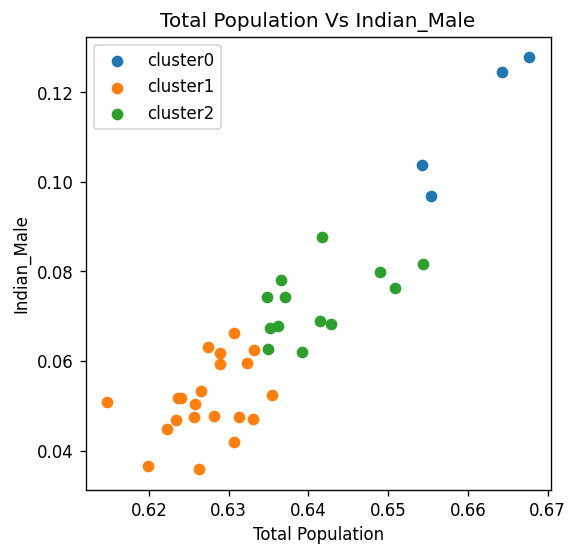

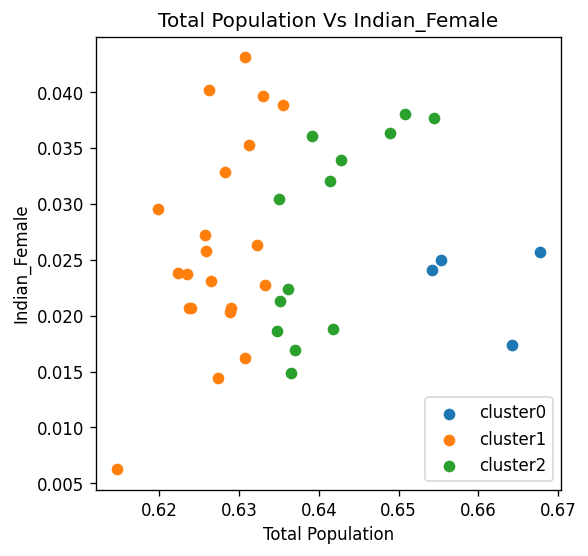

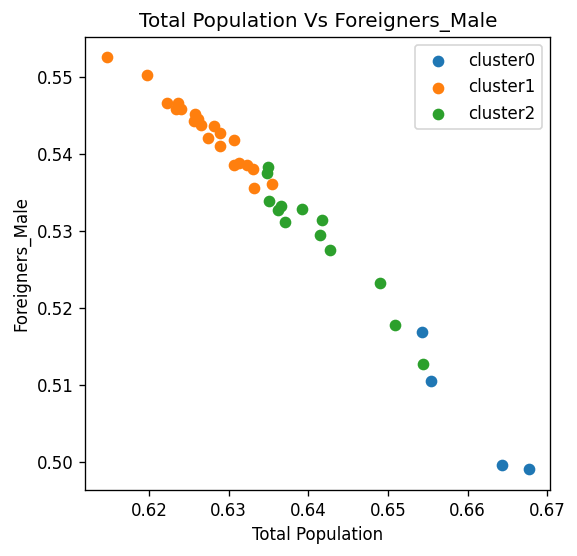

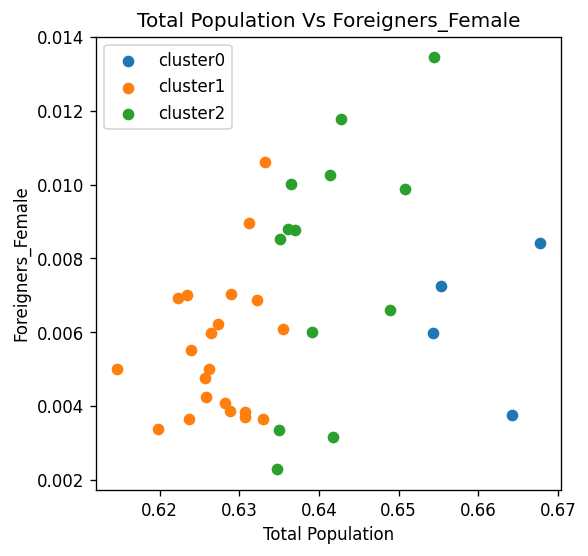

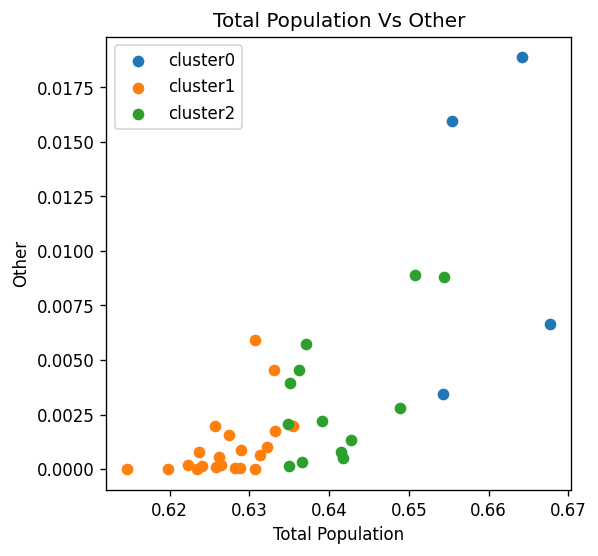

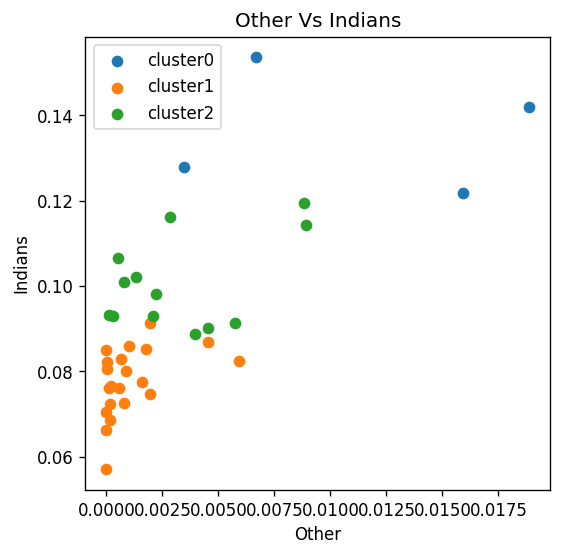

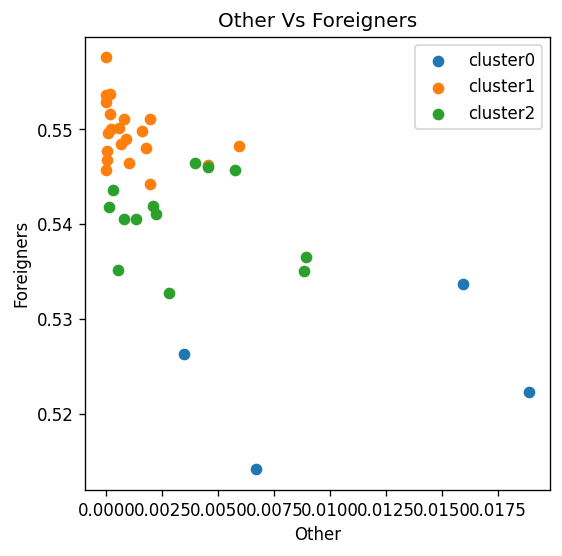

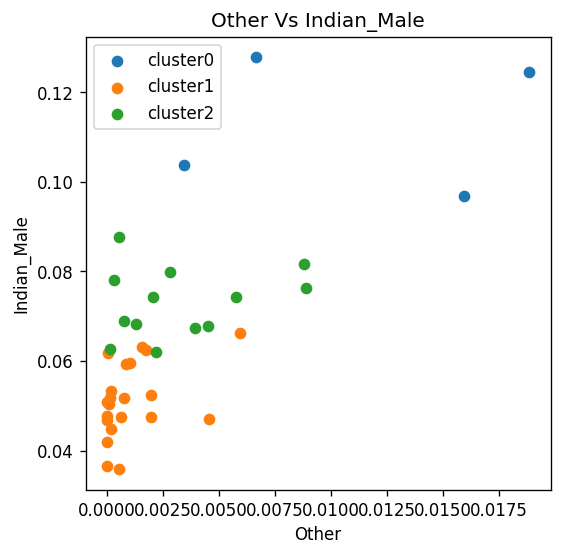

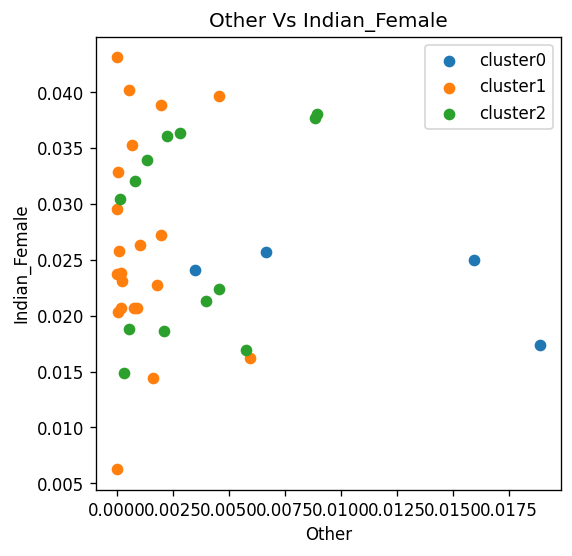

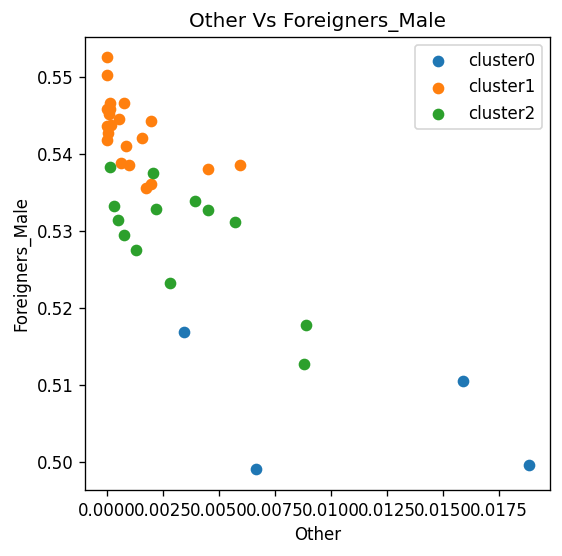

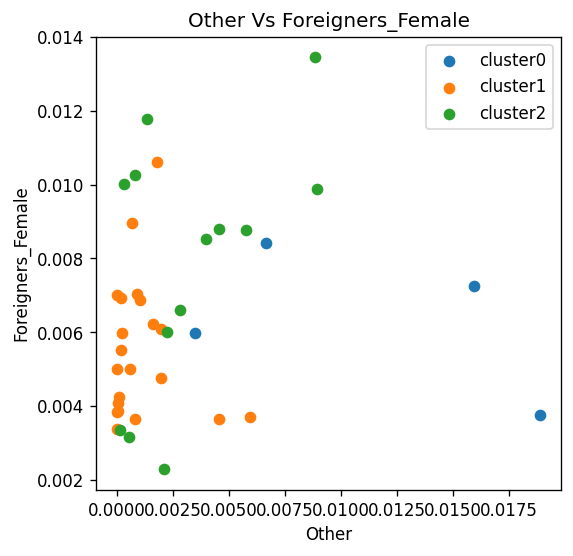

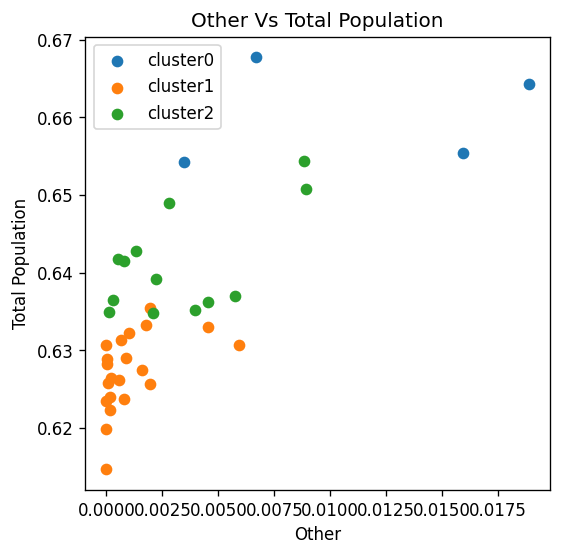

In [26]:
[plot_clusters(x,y,3) for x in data1.drop(columns=['cluster']).columns for y in data1.drop(columns=['cluster']).columns if x!=y]